In [39]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib

In [40]:
def plot_loss(loss_path:str|pathlib.Path, title:str, include:tuple[str, ...]=("loss", "eval_loss")):
    with open(loss_path) as f:
        data = json.load(f)
    include = list(include)
    df = pd.DataFrame.from_records(data['log_history'])
    new_names = {col:col.replace('_', " ").title() for col in include}
    df.rename(columns=new_names, inplace=True)
    display(df)
    df.set_index("step")[list(new_names.values())].interpolate('cubic').plot()
    plt.title(title)
    plt.xlabel("Training Steps")
    sns.despine(top=True)
    plt.ylabel("Loss")
    plt.grid()

,epoch,learning_rate,Loss,step,eval_runtime,eval_samples_per_second,eval_steps_per_second,total_flos,train_loss,train_runtime,train_samples_per_second,train_steps_per_second
0,0.01,1.780965e-06,1.1813,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.02,3.561930e-06,1.1183,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02,5.342895e-06,1.0470,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.03,7.123860e-06,0.9976,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.04,8.904825e-06,0.9647,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2009,14.98,1.109973e-09,0.1413,19710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,14.98,4.933219e-10,0.1417,19720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,14.99,1.233306e-10,0.1415,19730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,15.00,0.000000e+00,0.1406,19740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


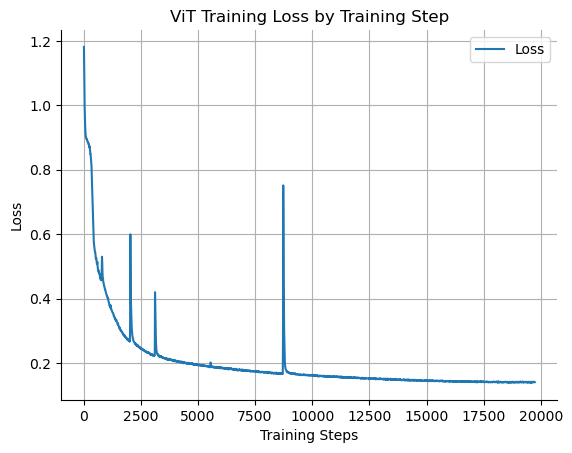

In [41]:
plot_loss("/media/jj_data/models/ViT/fixed_params/trainer_state.json", "ViT Training Loss by Training Step", ("loss",))

,epoch,learning_rate,Loss,step,total_flos,train_loss,train_runtime,train_samples_per_second,train_steps_per_second
0,0.00,4.997756e-05,4.8222,10,NaN,NaN,NaN,NaN,NaN
1,0.01,4.995512e-05,4.8187,20,NaN,NaN,NaN,NaN,NaN
2,0.01,4.993268e-05,4.8132,30,NaN,NaN,NaN,NaN,NaN
3,0.01,4.991024e-05,4.7993,40,NaN,NaN,NaN,NaN,NaN
4,0.02,4.988780e-05,4.7798,50,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2224,6.99,6.956600e-08,0.2311,22250,NaN,NaN,NaN,NaN,NaN
2225,6.99,4.712535e-08,0.2506,22260,NaN,NaN,NaN,NaN,NaN
2226,7.00,2.468471e-08,0.2289,22270,NaN,NaN,NaN,NaN,NaN
2227,7.00,2.244064e-09,0.2390,22280,NaN,NaN,NaN,NaN,NaN


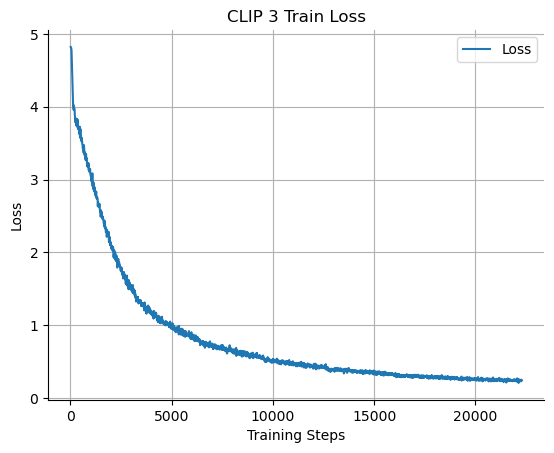

In [42]:
clip_train_loss_path = "/media/jj_data/models/CLIP/3/trainer_state.json"
plot_loss("/media/jj_data/models/CLIP/3/trainer_state.json", "CLIP 3 Train Loss", ("loss",))

,epoch,learning_rate,Loss,step,Eval Loss,eval_runtime,eval_samples_per_second,eval_steps_per_second
0,0.01,0.000050,4.8218,10,NaN,NaN,NaN,NaN
1,0.01,0.000050,4.8174,20,NaN,NaN,NaN,NaN
2,0.02,0.000050,4.7397,30,NaN,NaN,NaN,NaN
3,0.03,0.000050,4.6051,40,NaN,NaN,NaN,NaN
4,0.03,0.000050,4.4668,50,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
755,4.69,0.000016,0.8265,7470,NaN,NaN,NaN,NaN
756,4.70,0.000016,0.8180,7480,NaN,NaN,NaN,NaN
757,4.70,0.000016,0.8151,7490,NaN,NaN,NaN,NaN
758,4.71,0.000016,0.8140,7500,NaN,NaN,NaN,NaN


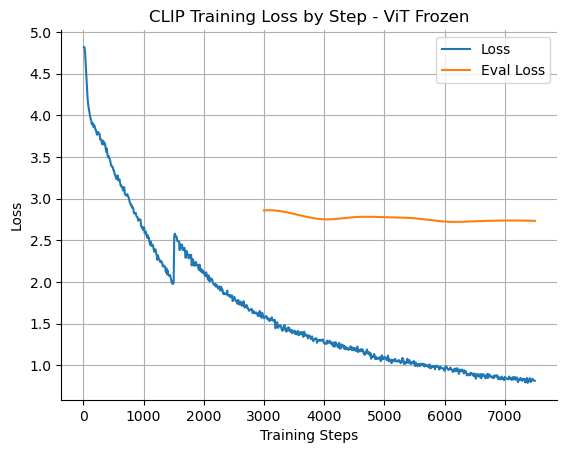

In [43]:
plot_loss( "/media/jj_data/models/CLIP/vis_freeze/checkpoint-7500/trainer_state.json", "CLIP Training Loss by Step - ViT Frozen")


,epoch,learning_rate,Loss,step,Eval Loss,eval_runtime,eval_samples_per_second,eval_steps_per_second,total_flos,train_loss,train_runtime,train_samples_per_second,train_steps_per_second
0,0.00,4.997756e-05,4.8211,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.01,4.995512e-05,4.8205,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.01,4.993268e-05,4.8203,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.01,4.991024e-05,4.8200,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02,4.988780e-05,4.8197,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2267,6.99,6.956600e-08,4.2303,22250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2268,6.99,4.712535e-08,4.2438,22260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2269,7.00,2.468471e-08,4.2109,22270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2270,7.00,2.244064e-09,4.2210,22280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


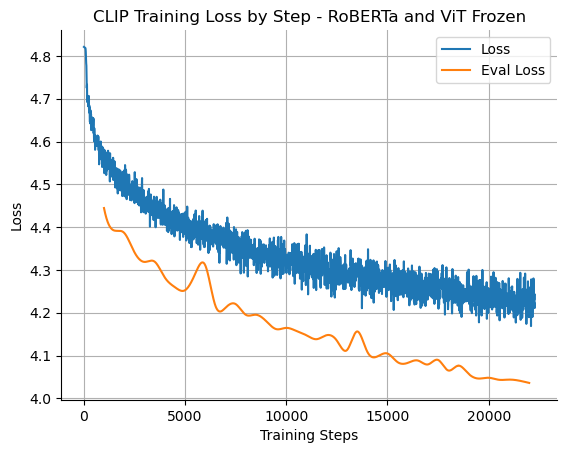

In [44]:
plot_loss("/media/jj_data/models/CLIP/text_freeze/trainer_state.json", "CLIP Training Loss by Step - RoBERTa and ViT Frozen")


,epoch,learning_rate,Loss,step,Eval Loss,eval_runtime,eval_samples_per_second,eval_steps_per_second
0,0.00,0.000050,4.8214,10,NaN,NaN,NaN,NaN
1,0.01,0.000050,4.8157,20,NaN,NaN,NaN,NaN
2,0.01,0.000050,4.7970,30,NaN,NaN,NaN,NaN
3,0.01,0.000050,4.7660,40,NaN,NaN,NaN,NaN
4,0.02,0.000050,4.7310,50,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2187,6.75,0.000002,0.0000,21470,NaN,NaN,NaN,NaN
2188,6.75,0.000002,0.0000,21480,NaN,NaN,NaN,NaN
2189,6.75,0.000002,0.0000,21490,NaN,NaN,NaN,NaN
2190,6.75,0.000002,0.0000,21500,NaN,NaN,NaN,NaN


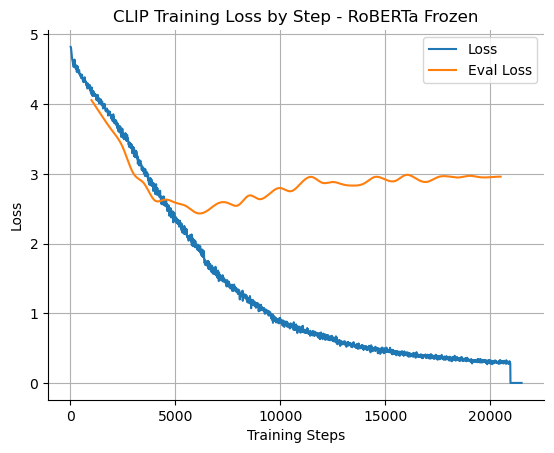

In [45]:
plot_loss("/media/jj_data/models/CLIP/text_freeze1/checkpoint-21500/trainer_state.json", "CLIP Training Loss by Step - RoBERTa Frozen")

,epoch,learning_rate,Loss,step,Eval Loss,eval_runtime,eval_samples_per_second,eval_steps_per_second,total_flos,train_loss,train_runtime,train_samples_per_second,train_steps_per_second
0,0.77,4.903846e-05,1.5514,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.54,4.807692e-05,1.2987,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.31,4.711538e-05,1.1798,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.08,4.615385e-05,1.1080,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.85,4.519231e-05,1.0647,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,38.46,1.923077e-06,0.7027,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,38.46,NaN,NaN,500,0.667385,0.2793,157.554,3.581,NaN,NaN,NaN,NaN,NaN
60,39.23,9.615385e-07,0.6995,510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,40.00,0.000000e+00,0.6964,520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


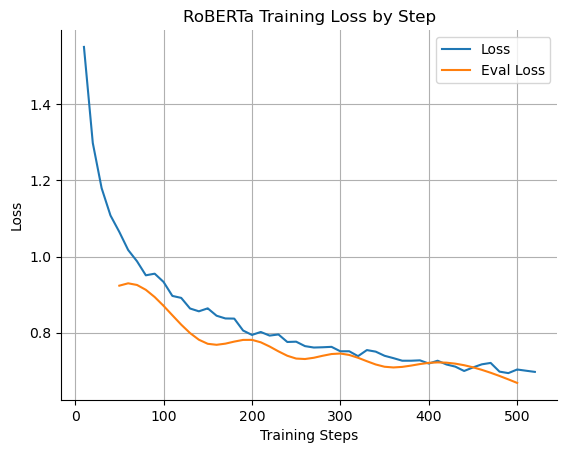

In [46]:
plot_loss("/media/jj_data/models/roberta/trainer_state.json", "RoBERTa Training Loss by Step")